 # Problem 1: Linear regression
 ## 1. Print the shapes of these four objects.

In [1]:
import numpy as np
import matplotlib.pyplot as pt
import mltools as ml


data = np.genfromtxt("data/curve80.txt")
X = data[:, 0]
X = np.atleast_2d(X).T
Y = data[:, 1]
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

print("Xtr Shape: ", Xtr.shape)
print("Xte Shape: ", Xte.shape)
print("Ytr Shape: ", Ytr.shape)
print("Yte Shape: ", Yte.shape)


Xtr Shape:  (60, 1)
Xte Shape:  (20, 1)
Ytr Shape:  (60,)
Yte Shape:  (20,)


 ## 2. Creating a linear regression predictor
 a) Creating a linear regression predictor

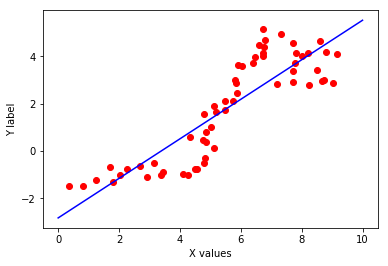

Linear regression co-efficients:
[[-2.82765049  0.83606916]]
Co-efficients obtained from the predicted values:
[-2.82765049] [0.83606916]


In [2]:
lr = ml.linear.linearRegress(Xtr, Ytr)
xs = np.linspace(0, 10, 200)
xs = xs[:, np.newaxis]
ys = lr.predict(xs)

pt.scatter(Xtr, Ytr, color="red", label="Training")
pt.plot(xs, ys, color="blue", label="Prediction function")
pt.xlabel("X values")
pt.ylabel("Y label")
pt.show()

print("Linear regression co-efficients:")
print(lr.theta)

print("Co-efficients obtained from the predicted values:")
print(ys[0], (ys[199]-ys[0])/(xs[199]-xs[0]))


 b) From above it is clear that the regression co-efficients match our plot.

In [3]:


def mse(X, Y):
    Yh = lr.predict(X)
    Ys = np.atleast_2d(Y).T
    e = Ys - Yh
    mse = e.T.dot(e) / X.shape[0]
    return np.squeeze(mse)


print('MSE on Training Data')
print(mse(Xtr, Ytr))
print('MSE on Test Data')
print(mse(Xte, Yte))


MSE on Training Data
1.127711955609391
MSE on Test Data
2.2423492030101246


 ## 3. Fitting y = f(x) using a polynomial function f(x) of increasing order.

In [4]:

Xtr2 = np.zeros((Xtr.shape[0], 2))
Xtr2[:, 0] = Xtr[:, 0]
Xtr2[:, 1] = Xtr[:, 0]**2

lr = ml.linear.linearRegress(Xtr2, Ytr)
xs = np.linspace(0, 10, 200)
xs = xs[:, np.newaxis]
ys = lr.predict(xs)


ValueError: shapes (200,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

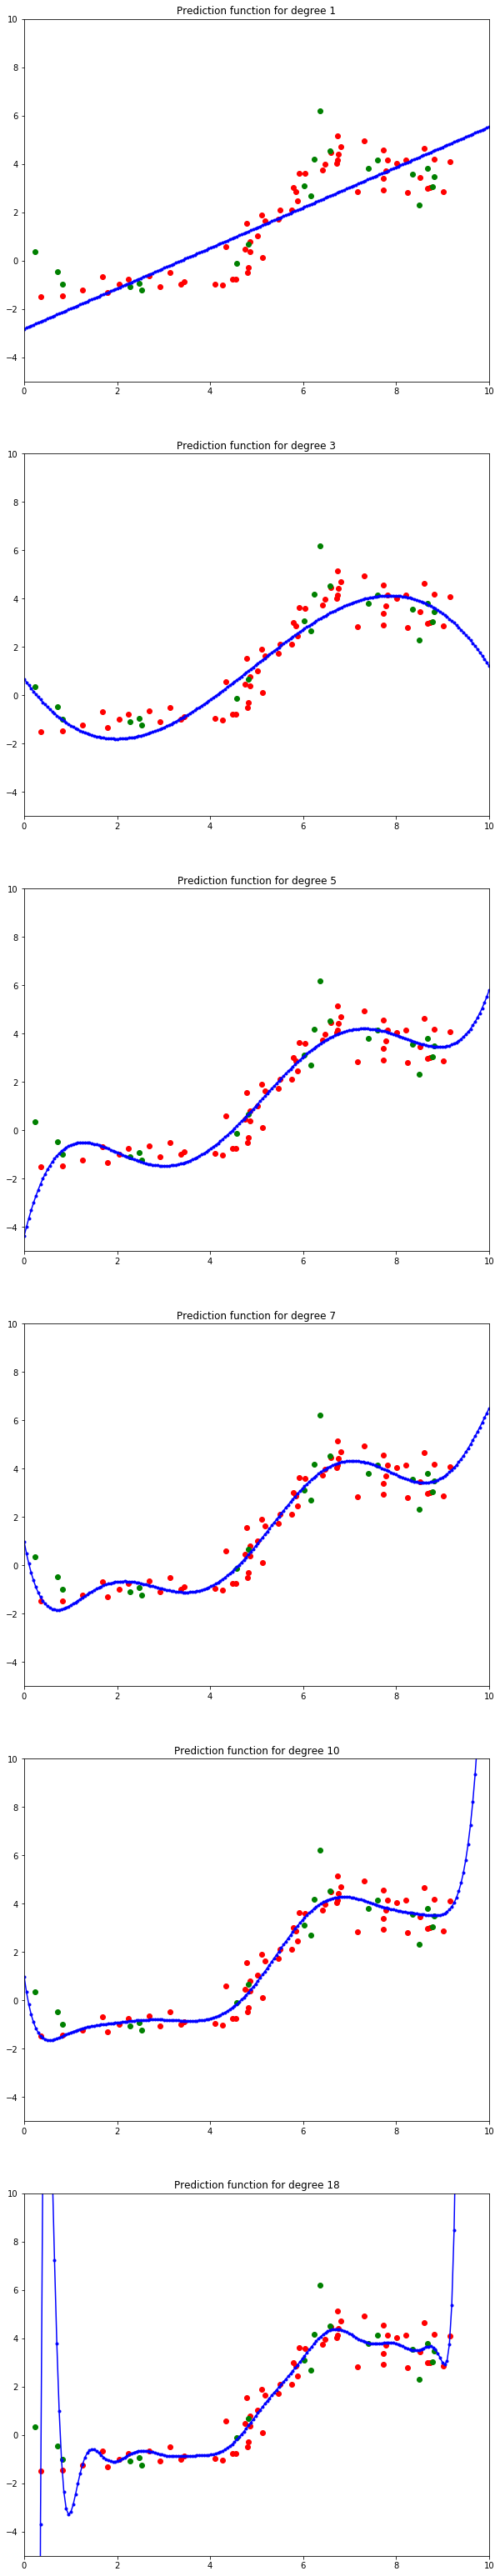

In [16]:


def Phi(X, degree, params):
    return ml.transforms.rescale(ml.transforms.fpoly(X, degree, False), params)[0]


degrees = [1, 3, 5, 7, 10, 18]
_fig, plots = pt.subplots(len(degrees), 1, figsize=(10, 56))
plots.ravel()

for index, degree in enumerate(degrees):
    plot = plots[index]
    XtrP = ml.transforms.fpoly(Xtr, degree, False)
    XtrP, params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = Phi(Xte, degree, params)
    xsP = Phi(xs, degree, params)
    YhatTrain = lr.predict(XtrP)
    YhatTest = lr.predict(XteP)
    YsHat = lr.predict(xsP)
    plot.scatter(Xtr, Ytr, color="red", label="Training")
    plot.scatter(Xte, Yte, color="green", label="Testing")
    plot.plot(
        xs, YsHat, color="blue",
        label="Prediction function for degree {}".format(degree),
        marker="."
    )
    plot.set_xlim(0, 10)
    plot.set_ylim(-5, 10)
    plot.set_title("Prediction function for degree {}".format(degree))
pt.show()